<a href="https://colab.research.google.com/github/ralsouza/python_fundamentos/blob/master/src/05_desafio/05_missao05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Missão: Analisar o Comportamento de Compra de Consumidores.**
### Nível de Dificuldade: Alto

Você recebeu a tarefa de analisar os dados de compras de um web site! Os dados estão no formato JSON e disponíveis junto com este notebook.

No site, cada usuário efetua login usando sua conta pessoal e pode adquirir produtos à medida que navega pela lista de produtos oferecidos. Cada produto possui um valor de venda. Dados de idade e sexo de cada usuário foram coletados e estão fornecidos no arquivo JSON.

Seu trabalho é entregar uma análise de comportamento de compra dos consumidores. Esse é um tipo de atividade comum realizado por Cientistas de Dados e o resultado deste trabalho pode ser usado, por exemplo, para alimentar um modelo de Machine Learning e fazer previsões sobre comportamentos futuros.

Mas nesta missão você vai analisar o comportamento de compra dos consumidores usando o pacote Pandas da linguagem Python e seu relatório final deve incluir cada um dos seguintes itens:


**Contagem de Consumidores**
* Número total de consumidores

**Análise Geral de Compras**
* Número de itens exclusivos
* Preço médio de compra
* Número total de compras
* Rendimento total (Valor Total)

**Informações Demográficas Por Gênero**
* Porcentagem e contagem de compradores masculinos
* Porcentagem e contagem de compradores do sexo feminino
* Porcentagem e contagem de outros / não divulgados

**Análise de Compras Por Gênero**
* Número de compras
* Preço médio de compra
* Valor Total de Compra
* Compras for faixa etária

**Identifique os 5 principais compradores pelo valor total de compra e, em seguida, liste (em uma tabela):**
* Login
* Número de compras
* Preço médio de compra
* Valor Total de Compra
* Itens mais populares

**Identifique os 5 itens mais populares por contagem de compras e, em seguida, liste (em uma tabela):**
* ID do item
* Nome do item
* Número de compras
* Preço do item
* Valor Total de Compra
* Itens mais lucrativos

**Identifique os 5 itens mais lucrativos pelo valor total de compra e, em seguida, liste (em uma tabela):**
* ID do item
* Nome do item
* Número de compras
* Preço do item
* Valor Total de Compra

**Como considerações finais:**
* Seu script deve funcionar para o conjunto de dados fornecido.
* Você deve usar a Biblioteca Pandas e o Jupyter Notebook.



In [0]:
# Imports
import pandas as pd
import numpy as np
import pylab as pl from pandas import *

In [0]:
# Carga do arquivo
load_file = "dados_compras.json"
purchase_file = pd.read_json(load_file, orient = "records")

## **1. Análise Exploratória**

### **1.1 Checagem das primeiras linhas**

In [0]:
# Nota-se que os logins se repetem.
purchase_file.sort_values('Login')

,Login,Idade,Sexo,Item ID,Nome do Item,Valor
144,Adairialis76,20,Masculino,44,Bonecarvin Battle Axe,2.46
308,Aduephos78,37,Masculino,79,"Alpha, Oath of Zeal",2.88
377,Aduephos78,37,Masculino,174,Primitive Blade,2.46
431,Aduephos78,37,Masculino,92,Final Critic,1.36
224,Aeduera68,26,Masculino,106,Crying Steel Sickle,2.29
...,...,...,...,...,...,...
363,Yathecal72,32,Masculino,16,Restored Bauble,3.11
580,Yathecal82,23,Masculino,178,"Oathbreaker, Last Hope of the Breaking Storm",2.41
437,Zhisrisu83,17,Masculino,82,Nirvana,1.11
376,Zhisrisu83,17,Masculino,33,Curved Axe,1.35


### **1.2 Checagem dos tipos dos dados**

In [0]:
purchase_file.dtypes

Login            object
Idade             int64
Sexo             object
Item ID           int64
Nome do Item     object
Valor           float64
dtype: object

### **1.3 Checagem de valores nulos**

In [0]:
purchase_file.isnull().sum().sort_values(ascending = False)

Valor           0
Nome do Item    0
Item ID         0
Sexo            0
Idade           0
Login           0
dtype: int64

### **1.4 Checagem de valores zero**

In [0]:
(purchase_file == 0).sum()

Login           0
Idade           0
Sexo            0
Item ID         1
Nome do Item    0
Valor           0
dtype: int64

### **1.5 Distribuição de idades**
O público mais representativo desta amostra encontra-se entre 19 há 26 anos de idade.

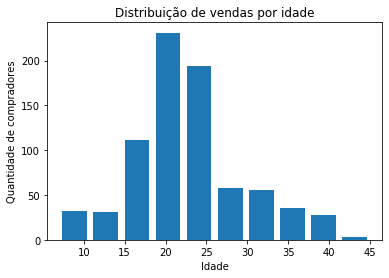

In [0]:
plt.hist(purchase_file['Idade'], histtype='bar', rwidth=0.8)

plt.title('Distribuição de vendas por idade')
plt.xlabel('Idade')
plt.ylabel('Quantidade de compradores')

plt.show()

### **1.6 Distribuição dos valores**
A maioria das vendas são dos produtos de `R$ 2,30`, `R$ 3,40` e `R$ 4,20`.

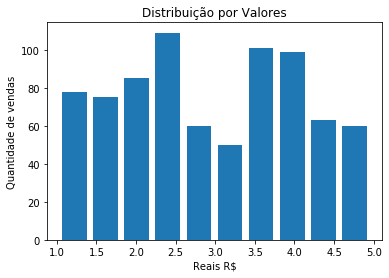

In [0]:
plt.hist(purchase_file['Valor'], histtype='bar', rwidth=0.8)

plt.title('Distribuição por Valores')
plt.xlabel('Reais R$')
plt.ylabel('Quantidade de vendas')

plt.show()

## **2. Informações Sobre os Consumidores**
* Número total de consumidores

In [0]:
# Contar a quantidade de logins, removendo as linhas com dados duplicados.

total_consumidores = purchase_file['Login'].drop_duplicates().count()
print('O total de consumidores na amostra são: {}'.format(total_consumidores))

O total de consumidores na amostra são: 573


## **3. Análise Geral de Compras**
* Número de itens exclusivos
* Preço médio de compra
* Número total de compras
* Rendimento total (Valor Total)

In [0]:
# Número de itens exclusivos
itens_exclusivos = purchase_file['Item ID'].drop_duplicates().count()

preco_medio = np.average(purchase_file['Valor'])

total_compras = purchase_file['Nome do Item'].count()

valor_total = np.sum(purchase_file['Valor'])

analise_geral = pd.DataFrame({
    'Itens Exclusivos':[itens_exclusivos],
    'Preço Médio (R$)':[np.round(preco_medio, decimals=2)],
    'Qtd. Compras':[total_compras],
    'Valor Total (R$)':[valor_total]
})

analise_geral

,Itens Exclusivos,Preço Médio (R$),Qtd. Compras,Valor Total (R$)
0,183,2.93,780,2286.33


## **4. Análise Demográfica por Genêro**
* Porcentagem e contagem de compradores masculinos
* Porcentagem e contagem de compradores do sexo feminino
* Porcentagem e contagem de outros / não divulgados

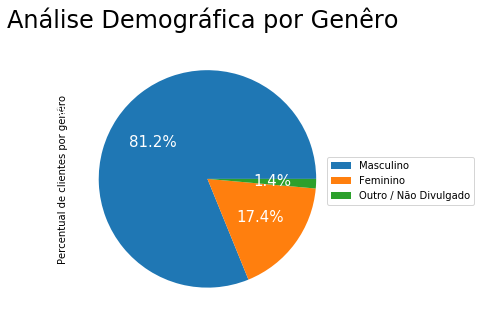

In [91]:
# Executa um 'group by' na variável
df = purchase_file['Sexo'].value_counts()

# Execução do plot
plt = df.plot.pie(autopct='%1.1f%%', fontsize=15,figsize=(5,5),textprops={'color':"w"})

# Adiciona o título no plot
pl.suptitle('Análise Demográfica por Genêro', fontsize=24)

# Remove a label no eixo y
pl.ylabel('Percentual de clientes por genêro')

# Adiciona a legenda
plt.legend(bbox_to_anchor=(1.5,0.6))

# Processa o plot, escondendo a linha de saída
pl.show()

## **5. Informações Demográficas Por Gênero**

In [0]:
# Implemente aqui sua solução

## **6. Análise de Compras Por Gênero**

In [0]:
# Implemente aqui sua solução

## **7. Consumidores Mais Populares (Top 5)**

In [0]:
# Implemente aqui sua solução

## **8. Itens Mais Populares**

In [0]:
# Implemente aqui sua solução

## **9. Itens Mais Lucrativos**

In [0]:
# Implemente aqui sua solução